In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train),type(y_train))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
y_train[:20]

In [5]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

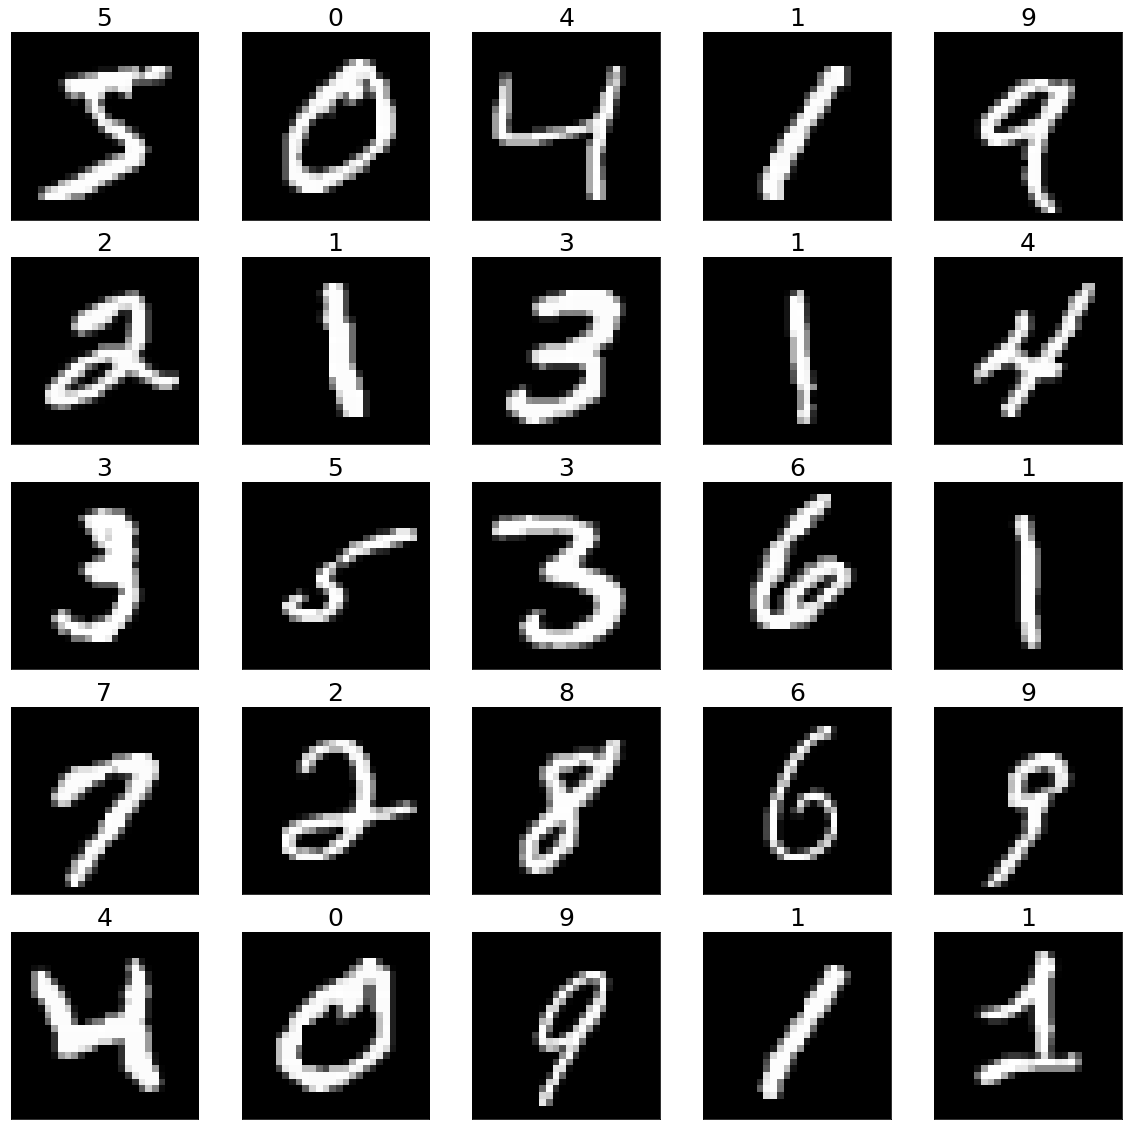

In [7]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontdict={'size':25})
plt.show()

In [8]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [9]:
#### Normalize
x_train = x_train/255
x_test = x_test/255

#### Reshaping
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


#### Building the CNN Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [11]:
m1 = Sequential()
m1.add(Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1))) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2))) # stride = 2

m1.add(Conv2D(32, (3,3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride = 2

m1.add(Flatten())
m1.add(Dense(16,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [12]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 16)                1

In [1]:
1=m1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

In [14]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.005376,0.9988,0.160555,0.960,20
21,0.008692,0.9976,0.127414,0.967,21
22,0.018865,0.9946,0.126778,0.961,22
23,0.020722,0.9920,0.108206,0.968,23
24,0.006195,0.9984,0.114367,0.967,24


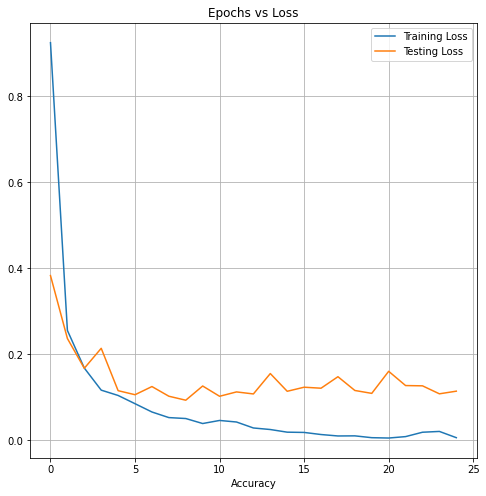

In [17]:
plt.figure(figsize=((8,8)))
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.title('Epochs vs Loss')
plt.grid()
plt.legend()
plt.show()

In [18]:
ypred_m1=m1.predict(x_test)


32/32 [==============================] - 1s 9ms/step


In [19]:
ypred_m1

array([[8.91086284e-15, 1.69679456e-13, 6.26443550e-11, ...,
        1.00000000e+00, 5.04333378e-14, 4.09574652e-10],
       [5.05331705e-08, 3.06305184e-04, 9.99693394e-01, ...,
        4.71922554e-17, 1.49610865e-10, 9.79867560e-24],
       [3.36530248e-09, 9.99996662e-01, 6.23326954e-08, ...,
        4.38840345e-07, 5.74923092e-07, 6.66910971e-11],
       ...,
       [1.00000000e+00, 1.58421144e-15, 4.23154844e-11, ...,
        8.12057352e-18, 1.35799614e-17, 1.55509167e-14],
       [8.75265442e-08, 4.66534722e-09, 7.06454983e-08, ...,
        6.03579497e-09, 9.99999881e-01, 3.03192182e-09],
       [2.78703549e-08, 3.61746189e-11, 1.16161158e-09, ...,
        6.11597730e-04, 1.52842915e-07, 9.99298453e-01]], dtype=float32)

In [26]:
ypred=[np.argmax(i) for  i in ypred_m1]

In [31]:
test_pred=m1.predict(x_test[[85]])
test_pred

1/1 [==============================] - 0s 29ms/step


array([[4.0450699e-21, 1.3759410e-07, 1.0140835e-12, 3.4595888e-21,
        9.9999905e-01, 3.1990950e-14, 6.8318505e-15, 8.6009192e-07,
        1.6382103e-10, 3.1768889e-14]], dtype=float32)

C:\Users\admin\AppData\Local\Temp\ipykernel_10352\2152745588.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


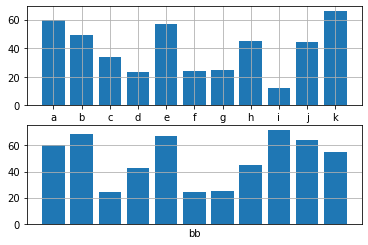

In [37]:
x='abcdefghijk'
xx=[i for i in x]
y=[60,49,34,23,57,24,25,45,12,44,66]
z=[60,69,24,43,67,24,25,45,72,64,55]
yy=pd.DataFrame({'name':xx,'marks_1':y,'marks_2':z})
plt.subplot(2,1,1)
plt.bar(yy['name'],yy['marks_1'])
plt.xlabel('aa')
plt.grid()
plt.subplot(2,1,2)
plt.bar(yy['name'],yy['marks_2'])
plt.xlabel('bb')
plt.grid()
plt.xticks([])
plt.show()

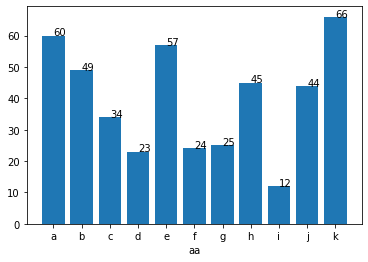

In [42]:
plt.bar(yy['name'],yy['marks_1'])
for i,j in zip(yy['name'],yy['marks_1']):
    plt.annotate(j,xy=[i,j])
plt.xlabel('aa')
plt.show()